I created this dashboard for myself and another user, both ameateur runners, to visualise our statistics both separately and combined.  It was written in Google Colab (cloud-based) to allow access to both users.

# ***SET-UP CODE***


In [1]:
!pip install jupyter-dash
!pip install dash
!pip install dash_core_components
!pip install dash_html_components
!pip install plotly
!pip install --upgrade dash

In [2]:
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import norm

import plotly.graph_objects as go
from datetime import datetime, timedelta
import math

import seaborn as sns

In [3]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__,external_stylesheets = external_stylesheets)
#app = JupyterDash(__name__)

/usr/local/lib/python3.10/dist-packages/dash/dash.py:556: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [4]:
def time_decimal_to_timedelta(input_decimal):
    return timedelta(minutes=math.floor(input_decimal), seconds=(input_decimal - math.floor(input_decimal))*100)

# ***USER 1 DATA***


In [5]:
# The other user of this dashboard is not familiar with programming.  Hence inputting new data to update the dashboard was primarily made to be user-friendly for them, and is inelegant.

#Whole Run Data

# Pace
a_pace = [5.56,5.53,5.57,6.01,6.11,6.17,5.56,6.07,5.54,5.53,6.01,6.08,5.54,6.09,6.13,6.23,6.39,6.26,6.26]

# Heart Rate
a_hr = [175,177,178,170,170,170,164,171,177,176,175,172,174,169,166,176,177,180,180]

# Distance
a_distance = [8.27,10.39,10.52,6.22,16.11,10.32,6.18,8.21,12.53,10.4,10.39,8.86,6.34,8.88,6.26,8.9,9.01,6.14,6.65]

# Pace Conversion
a_pace_intermediate = list(map(time_decimal_to_timedelta, a_pace))
a_reference_date = datetime.today().replace(hour=0, minute=0, second=0, microsecond=0)
a_pace_new = [a_reference_date + time for time in a_pace_intermediate]

In [6]:
# Splits Data

# From Strava

a_data_400m = [5.13,5.08,5,5.25,5.08,5.45,5.2,5.25,5.2,5.13,5.3,5.05,5.1,5.1,5.25,5.22,5.18,5.28,5.18,4.55,5.05,4.48,5.1,5.03,4.58,4.58,4.55,5.25]
a_data_halfmile = [5.22,5.18,5.12,5.29,5.19,5.53,5.27,5.28,5.23,5.22,5.39,5.14,5.19,5.28,5.39,5.33,5.32,5.3,5.28,5.11,5.16,5.09,5.18,5.14,5.22,5.07,5.09,5.33]
a_data_onekm = [5.24,5.19,5.14,5.32,5.22,5.58,5.28,5.27,5.26,5.22,5.42,5.2,5.22,5.3,5.36,5.34,5.37,5.34,5.32,5.15,5.18,5.13,5.21,5.14,5.24,5.1,5.12,5.34]
a_data_onemile = [5.31,5.32,5.18,5.4,5.3,5.59,5.35,5.45,5.31,5.29,5.46,5.52,5.54,5.43,5.41,6.2,5.52,5.39,5.21,5.26,5.29,5.29,5.21,5.29,5.23,5.19,5.355]
a_data_twomile = [5.43,5.4,5.28,5.57,5.47,6.05,5.5,5.56,5.4,5.44,5.57,6.11,5.49,6.01,6.06,5.58,6.28,6.14,6.01,5.34,5.32,5.38,5.37,5.27,5.34,5.37,5.38]
a_data_fivekm = [5.48,5.5,5.37,6.02,5.52,6.06,5.53,6.02,5.4,5.47,5.56,6.11,5.52,6.07,6.11,6.1,6.32,6.22,6.17,5.41,5.4,5.45,5.46,5.36,5.4]
a_data_tenkm = [6,5.57,6.05,6.17,5.5,5.54,6.02,6.01,5.58,6.08]

# Converted into Date-Time Format

a_pace_400m_intermediate = list(map(time_decimal_to_timedelta, a_data_400m))
a_data_400m_new = [a_reference_date + time for time in a_pace_400m_intermediate]

a_pace_halfmile_intermediate = list(map(time_decimal_to_timedelta, a_data_halfmile))
a_data_halfmile_new = [a_reference_date + time for time in a_pace_halfmile_intermediate]

a_pace_onekm_intermediate = list(map(time_decimal_to_timedelta, a_data_onekm))
a_data_onekm_new = [a_reference_date + time for time in a_pace_onekm_intermediate]

a_pace_onemile_intermediate = list(map(time_decimal_to_timedelta, a_data_onemile))
a_data_onemile_new = [a_reference_date + time for time in a_pace_onemile_intermediate]

a_pace_twomile_intermediate = list(map(time_decimal_to_timedelta, a_data_twomile))
a_data_twomile_new = [a_reference_date + time for time in a_pace_twomile_intermediate]

a_pace_fivekm_intermediate = list(map(time_decimal_to_timedelta, a_data_fivekm))
a_data_fivekm_new = [a_reference_date + time for time in a_pace_fivekm_intermediate]

a_pace_tenkm_intermediate = list(map(time_decimal_to_timedelta, a_data_tenkm))
a_data_tenkm_new = [a_reference_date + time for time in a_pace_tenkm_intermediate]

# Converted into Arrays for Graphs

a_data_400m_new_ar = np.array(a_data_400m_new)
a_data_halfmile_new_ar = np.array(a_data_halfmile_new)
a_data_onekm_new_ar = np.array(a_data_onekm_new)
a_data_onemile_new_ar = np.array(a_data_onemile_new)
a_data_twomile_new_ar = np.array(a_data_twomile_new)
a_data_fivekm_new_ar = np.array(a_data_fivekm_new)
a_data_tenkm_new_ar = np.array(a_data_tenkm_new)


# ***USER 1 GRAPHS***


Text(0, 0.5, 'Pace, min/km')

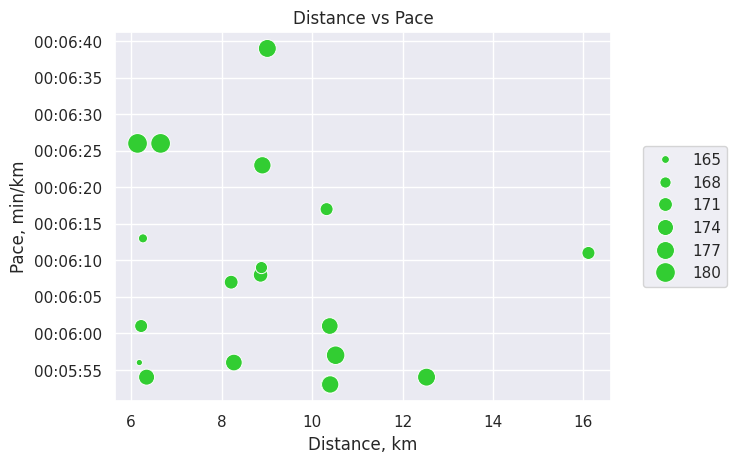

In [7]:
# Graph 1

df = pd.DataFrame({'Pace': a_pace_new, 'HeartRate': a_hr, 'Distance': a_distance})
sns.set_theme()

a_graph_1 = sns.scatterplot(x='Distance', y='Pace', size='HeartRate', sizes=(20, 200), data=df, markers='o', color='limegreen')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.title('Distance vs Pace')
plt.xlabel('Distance, km')
plt.ylabel('Pace, min/km')


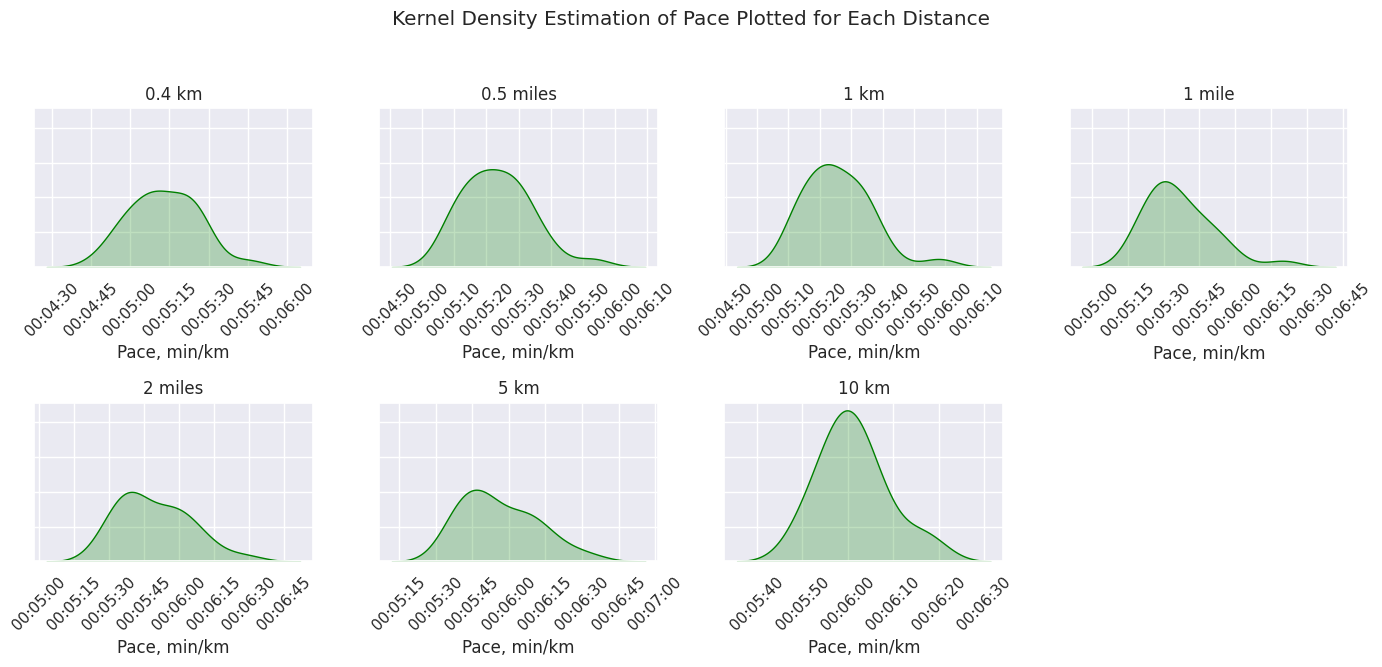

In [8]:
# Graph 2

import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

sns.set_theme()

distances = ['0.4 km', '0.5 miles', '1 km', '1 mile', '2 miles', '5 km', '10 km']
pace_data = [a_data_400m_new_ar, a_data_halfmile_new_ar, a_data_onekm_new_ar, a_data_onemile_new_ar, a_data_twomile_new_ar, a_data_fivekm_new_ar, a_data_tenkm_new_ar]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 7), sharey=True)
fig.suptitle('Kernel Density Estimation of Pace Plotted for Each Distance')

axes = axes.flatten()

for i, (distance, data) in enumerate(zip(distances, pace_data)):
    sns.kdeplot(data, ax=axes[i], label=distance, fill=True, color='green') # kernel density estimate (KDE) for each distance
    axes[i].set_title(distance)
    axes[i].set_xlabel('Pace, min/km')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_yticklabels([])
    axes[i].set_ylabel('')

num_distances = len(distances)
num_cols = min(num_distances, 4)
num_rows = -(-num_distances // num_cols)

for j in range(num_distances, num_cols * num_rows):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

a_graph_2=fig


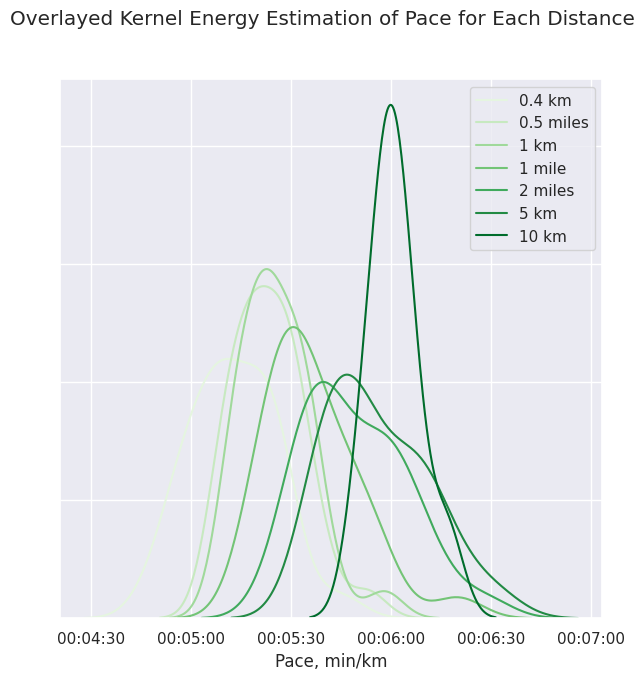

In [9]:
# Graph 3

distances = ['0.4 km', '0.5 miles', '1 km', '1 mile', '2 miles', '5 km', '10 km']
pace_data = [a_data_400m_new_ar, a_data_halfmile_new_ar, a_data_onekm_new_ar, a_data_onemile_new_ar, a_data_twomile_new_ar, a_data_fivekm_new_ar, a_data_tenkm_new_ar]

sns.set_theme()
fig, ax = plt.subplots(figsize=(7, 7))
fig.suptitle('Overlayed Kernel Energy Estimation of Pace for Each Distance')

palette = sns.color_palette('Greens', n_colors=len(distances))

def format_func(x, _):
    return (a_reference_date + timedelta(minutes=x)).strftime('%M:%S')

for i, (distance, data) in enumerate(zip(distances, pace_data)):
    sns.kdeplot(data, ax=ax, label=distance, fill=False, color=palette[i])

#for distance, data in enumerate(zip(distances, pace_data)):
#    sns.kdeplot(data, ax=ax, label=distance, fill=False)

ax.set_xlabel('Pace, min/km')
ax.set_ylabel('')
ax.set_yticklabels([])

ax.legend()
a_graph_3=fig
plt.show()

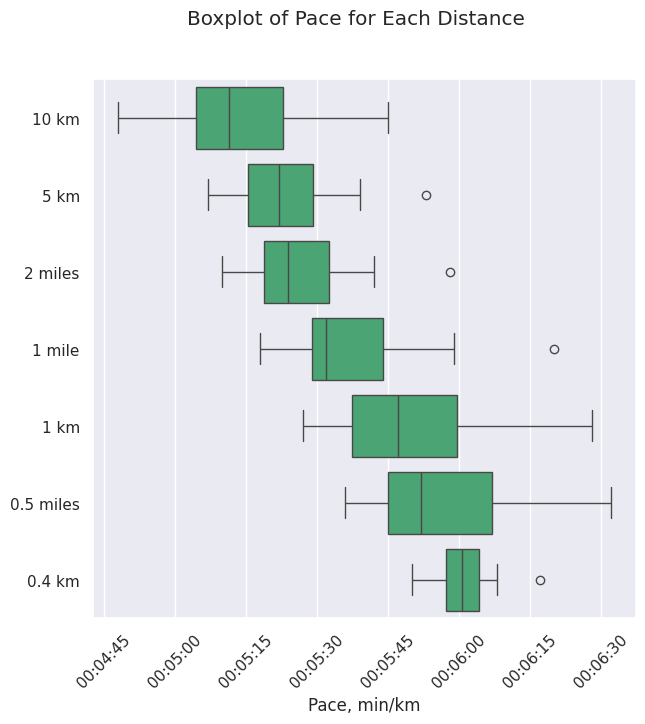

In [10]:
# Graph 4

distances = ['0.4 km', '0.5 miles', '1 km', '1 mile', '2 miles', '5 km', '10 km']
pace_data = [a_data_400m_new_ar, a_data_halfmile_new_ar, a_data_onekm_new_ar, a_data_onemile_new_ar, a_data_twomile_new_ar, a_data_fivekm_new_ar, a_data_tenkm_new_ar]
distances.reverse()
sns.set_theme()

all_pace_data = np.concatenate(pace_data)

fig, ax = plt.subplots(figsize=(7, 7))
fig.suptitle('Boxplot of Pace for Each Distance')

def format_func(x, _):
    return (a_reference_date + timedelta(minutes=x)).strftime('%M:%S')

sns.boxplot(x=all_pace_data, y=np.repeat(distances, [len(data) for data in pace_data]), ax=ax, color='mediumseagreen')
ax.set_xlabel('Pace, min/km')
ax.tick_params(axis='x', rotation=45)

a_graph_4=fig
plt.show()

<ipython-input-11-a8e559a1f313>:31: UserWarning:

FixedFormatter should only be used together with FixedLocator



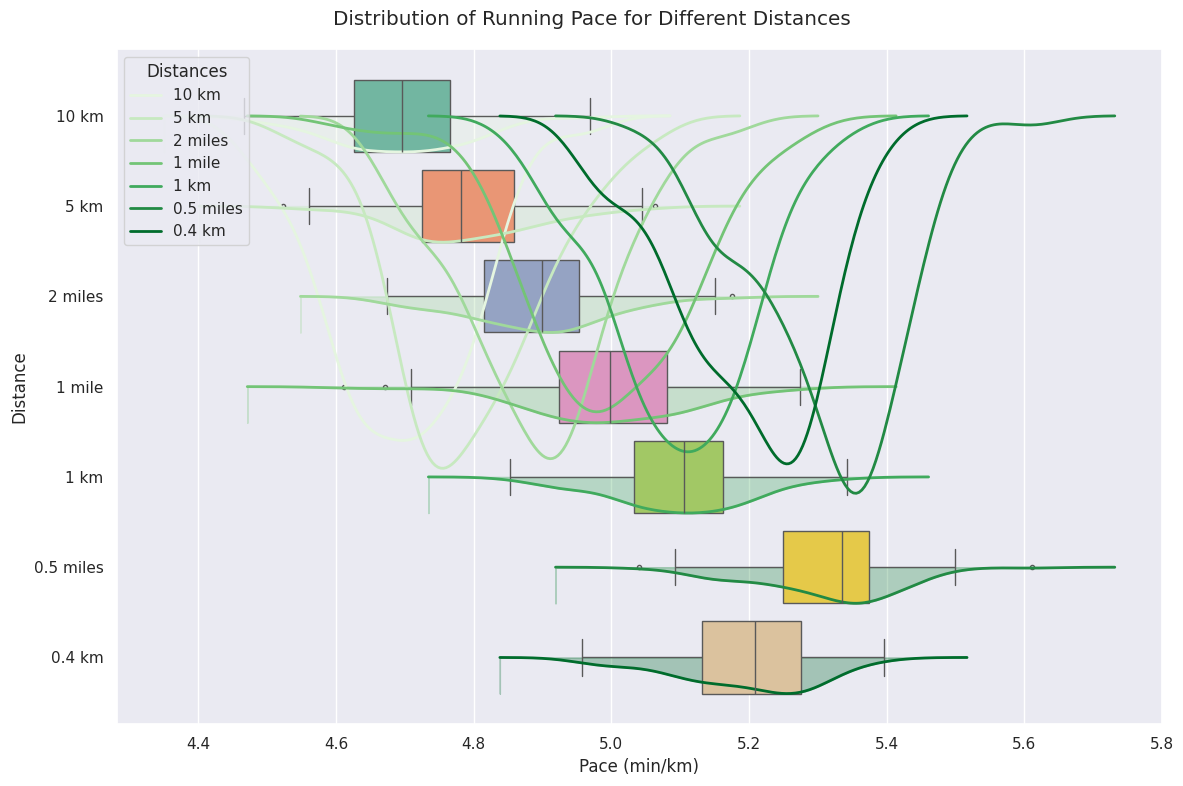

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example data - replace with your actual data
a_data_400m_new_ar = np.random.normal(5.2, 0.1, 100)
a_data_halfmile_new_ar = np.random.normal(5.3, 0.1, 100)
a_data_onekm_new_ar = np.random.normal(5.1, 0.1, 100)
a_data_onemile_new_ar = np.random.normal(5.0, 0.1, 100)
a_data_twomile_new_ar = np.random.normal(4.9, 0.1, 100)
a_data_fivekm_new_ar = np.random.normal(4.8, 0.1, 100)
a_data_tenkm_new_ar = np.random.normal(4.7, 0.1, 100)

# Data preparation
distances = ['0.4 km', '0.5 miles', '1 km', '1 mile', '2 miles', '5 km', '10 km']
pace_data = [a_data_400m_new_ar, a_data_halfmile_new_ar, a_data_onekm_new_ar,
             a_data_onemile_new_ar, a_data_twomile_new_ar, a_data_fivekm_new_ar,
             a_data_tenkm_new_ar]

# Reverse the lists for plotting in descending order
distances.reverse()
pace_data.reverse()

# Prepare for plotting
sns.set_theme()
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Distribution of Running Pace for Different Distances')

# Boxplot
sns.boxplot(data=pace_data, orient='h', palette='Set2', ax=ax, fliersize=3)
ax.set_yticklabels(distances)
ax.set_xlabel('Pace (min/km)')
ax.set_ylabel('Distance')

# KDE Plot overlay
palette = sns.color_palette('Greens', n_colors=len(distances))

for i, data in enumerate(pace_data):
    # Compute KDE
    kde = sns.kdeplot(data, ax=ax, color=palette[i], linewidth=2, label=distances[i])

    # Offset and flip KDE plot
    y_offset = i
    x, y = kde.get_lines()[-1].get_data()
    y_scaled = y / max(y) * 0.4  # Scale KDE to fit within box plot height
    ax.plot(x, y_scaled + y_offset, color=palette[i], linewidth=2)
    ax.fill_betweenx(y_scaled + y_offset, x, x2=min(x), color=palette[i], alpha=0.3)

# Adjust legend and layout
ax.legend(title='Distances', loc='upper left')
plt.tight_layout()
plt.show()


# ***USER 1 & PARTNER DATA***

In [12]:
ab_pace=[7.12,6.42,6.39,7.09,6.53,6.55,6.17,7.17,7.21,6.54]
ab_hr=[155,161,152,152,159,158,170,152,154,150]
ab_distance=[4.93,5.5,5.5,5.46,5.22,5.26,10.32,2.08,2.44,2.52]

ab_pace_intermediate = list(map(time_decimal_to_timedelta, ab_pace))
ab_reference_date = datetime.today().replace(hour=0, minute=0, second=0, microsecond=0)
ab_pace_new = [ab_reference_date + time for time in ab_pace_intermediate]

# ***USER 1 & PARTNER GRAPHS***

Text(0, 0.5, 'Pace, min/km')

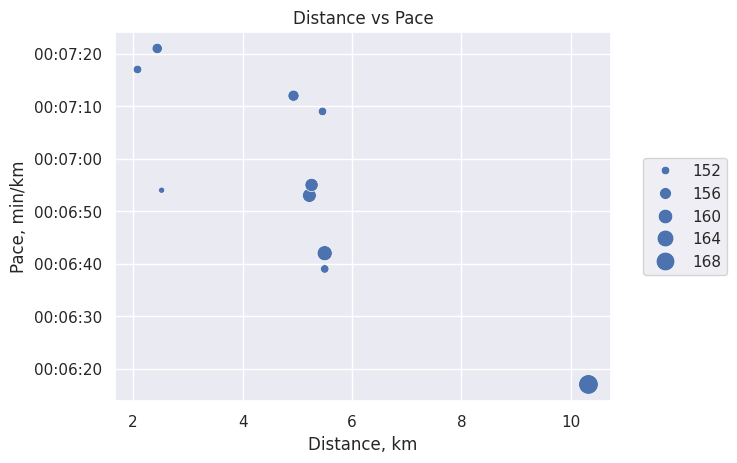

In [13]:
# Graph 1

df = pd.DataFrame({'Pace': ab_pace_new, 'HeartRate': ab_hr, 'Distance': ab_distance})
sns.set_theme()

ab_graph_1 = sns.scatterplot(x='Distance', y='Pace', size='HeartRate', sizes=(20, 200), data=df, markers='o')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.title('Distance vs Pace')
plt.xlabel('Distance, km')
plt.ylabel('Pace, min/km')

In [14]:
# GRAPH 2

#ab_hr=[152,159,158,170,152,154,150]
#a_hr = [171,177,176,175,172,174,169,166,176,177,180,180,170,170,170,164,171,177,176,175,172,174,169,166,176,177,180,180]

a_sizes = [hr * 0.1 for hr in a_hr]
ab_sizes = [hr * 0.1 for hr in ab_hr]

combined_fig_pacehr = go.Figure()
sns.set_theme()

combined_fig_pacehr.add_trace(go.Scatter(
    x=a_pace_new,
    y=a_distance,
    mode='markers',
    name='Lonely Alex Run',
    marker=dict(color='forestgreen', size=a_sizes),
))

combined_fig_pacehr.add_trace(go.Scatter(
    x=ab_pace_new,
    y=ab_distance,
    mode='markers',
    name='Alex & Becca Run ',
    marker=dict(color='red',size=ab_sizes),
))

# Update the layout
combined_fig_pacehr.update_layout(
    title='Pace vs. Heart Rate',
    xaxis_title='Pace, min/km',
    yaxis_title='Distance, km',
    height=700,
    width=900,
    xaxis=dict(
        tickformat='%M:%S',  # Use '%M:%S' for minutes and seconds format
    )
)

ab_graph_2 = combined_fig_pacehr
ab_graph_2.show()

# ***USER 2 DATA***

In [15]:
# Whole Run Data

# Pace
s_pace = [5.44,5.47,5.45,5.51,5.37,5.50,5.31,5.53,5.58,5.38,5.32,5.40,5.43,5.49,5.26,5.23,5.21,5.21,5.21,5.27,5.47,5.43,5.29,5.28,5.29,5.31,5.31,5.48,5.27,5.51,5.22]

# Heart Rate
s_hr = [163,166,163,160,168,151,164,161,152,160,172,147,156,156,157,163,162,163,163,159,160,154,169,160,164,160,152,152,151,165,164]

# Distance
s_distance=[5.06,6.13,5.25,5.09,5.09,4.08,4.9,4.15,12.15,5.46,7.07,6.09,10.12,7.37,5.72,5.07,5.12,6.07,5.65,7.09,5.42,3.58,5.77,10.13,7.18,5.63,5.08,5.07,4.16,8.09,4.06]

# Pace Conversion for Plots
s_pace_intermediate = list(map(time_decimal_to_timedelta, s_pace))
s_reference_date = datetime.today().replace(hour=0, minute=0, second=0, microsecond=0)
s_pace_new = [s_reference_date + time for time in s_pace_intermediate]



In [16]:

# Sophie's Data
s_data_400m = [5.33,5.15,5.08,5.22,5.20,5.15,5.20,5.05,5.40,5.33,5.10,5.20,5.25,5.25,5.08,4.25,5.1,4.53,5.1,5.05,5.1,5.35,5.32,5.08,5.08,5.05,5.1,4.48,5.01,5.1,5.28,5.03]
s_data_halfmile = [5.37,5.22,5.17,5.29,5.23,5.20,5.35,5.11,5.42,5.37,5.17,5.23,5.27,5.30,5.16,4.3,5.13,4.57,5.09,5.08,5.13,5.38,5.37,5.12,5.13,5.07,5.11,5.09,5.06,5.12,5.33,5.08]
s_data_onekm = [5.37,05.22,5.17,5.30,05.27,5.23,5.42,05.14,5.41,5.39,5.22,5.23,5.28,5.31,5.21,4.4,5.13,5.0,5.12,5.1,5.16,5.39,5.37,5.15,5.12,5.08,5.12,5.22,5.08,5.14,5.32,5.23]
s_data_onemile = [5.41,5.33,5.32,5.29,5.35,5.26,5.47,5.17,5.43,5.39,5.26,5.25,5.32,5.35,5.32,4.53,5.13,5.05,5.13,5.16,5.18,5.39,5.39,5.17,5.16,5.11,5.17,5.23,6.38,5.16,5.36,5.49]
s_data_twomile = [5.45,5.34,5.39,5.44,5.40,5.31,5.53,5.26,5.50,5.45,5.33,5.29,5.42,5.41,5.35,6.45,5.16,5.16,5.17,5.37,5.22,5.42,5.42,5.26,5.24,5.43,5.26,5.26,8.22,6.22,5.57,6.3]
s_data_fivekm = [5.43,5.46,5.45,5.50,5.37,5.48,5.35,5.38,5.54,5.53,5.54,6.56,5.22,6.06,5.2,5.31,5.4,5.46,5.32,5.,6.23,6.27,5.38,8.06,6.35]
s_data_tenkm = [6.01,5.58,5.54]

s_pace_400m_intermediate = list(map(time_decimal_to_timedelta, s_data_400m))
s_data_400m_new = [s_reference_date + time for time in s_pace_400m_intermediate]

s_pace_halfmile_intermediate = list(map(time_decimal_to_timedelta, s_data_halfmile))
s_data_halfmile_new = [s_reference_date + time for time in s_pace_halfmile_intermediate]

s_pace_onekm_intermediate = list(map(time_decimal_to_timedelta, s_data_onekm))
s_data_onekm_new = [s_reference_date + time for time in s_pace_onekm_intermediate]

s_pace_onemile_intermediate = list(map(time_decimal_to_timedelta, s_data_onemile))
s_data_onemile_new = [s_reference_date + time for time in s_pace_onemile_intermediate]

s_pace_twomile_intermediate = list(map(time_decimal_to_timedelta, s_data_twomile))
s_data_twomile_new = [s_reference_date + time for time in s_pace_twomile_intermediate]

s_pace_fivekm_intermediate = list(map(time_decimal_to_timedelta, s_data_fivekm))
s_data_fivekm_new = [s_reference_date + time for time in s_pace_fivekm_intermediate]

s_pace_tenkm_intermediate = list(map(time_decimal_to_timedelta, s_data_tenkm))
s_data_tenkm_new = [s_reference_date + time for time in s_pace_tenkm_intermediate]

# Converted into Arrays for Graphs

s_data_400m_new_ar = np.array(s_data_400m_new)
s_data_halfmile_new_ar = np.array(s_data_halfmile_new)
s_data_onekm_new_ar = np.array(s_data_onekm_new)
s_data_onemile_new_ar = np.array(s_data_onemile_new)
s_data_twomile_new_ar = np.array(s_data_twomile_new)
s_data_fivekm_new_ar = np.array(s_data_fivekm_new)
s_data_tenkm_new_ar = np.array(s_data_tenkm_new)


# ***USER 2 GRAPHS***

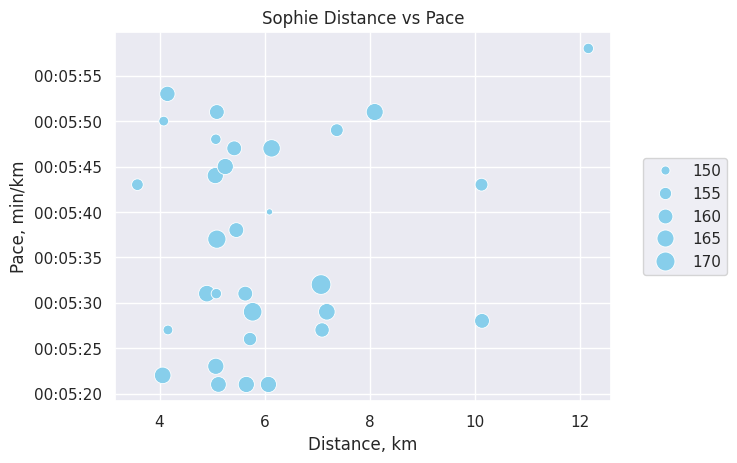

In [17]:
# Graph 1

df = pd.DataFrame({'Pace': s_pace_new, 'HeartRate': s_hr, 'Distance': s_distance})
sns.set_theme()

s_graph_1 = sns.scatterplot(x='Distance', y='Pace', size='HeartRate', color='skyblue', sizes=(20, 200), data=df, markers='o')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.title('Sophie Distance vs Pace')
plt.xlabel('Distance, km')
plt.ylabel('Pace, min/km')

plt.show()

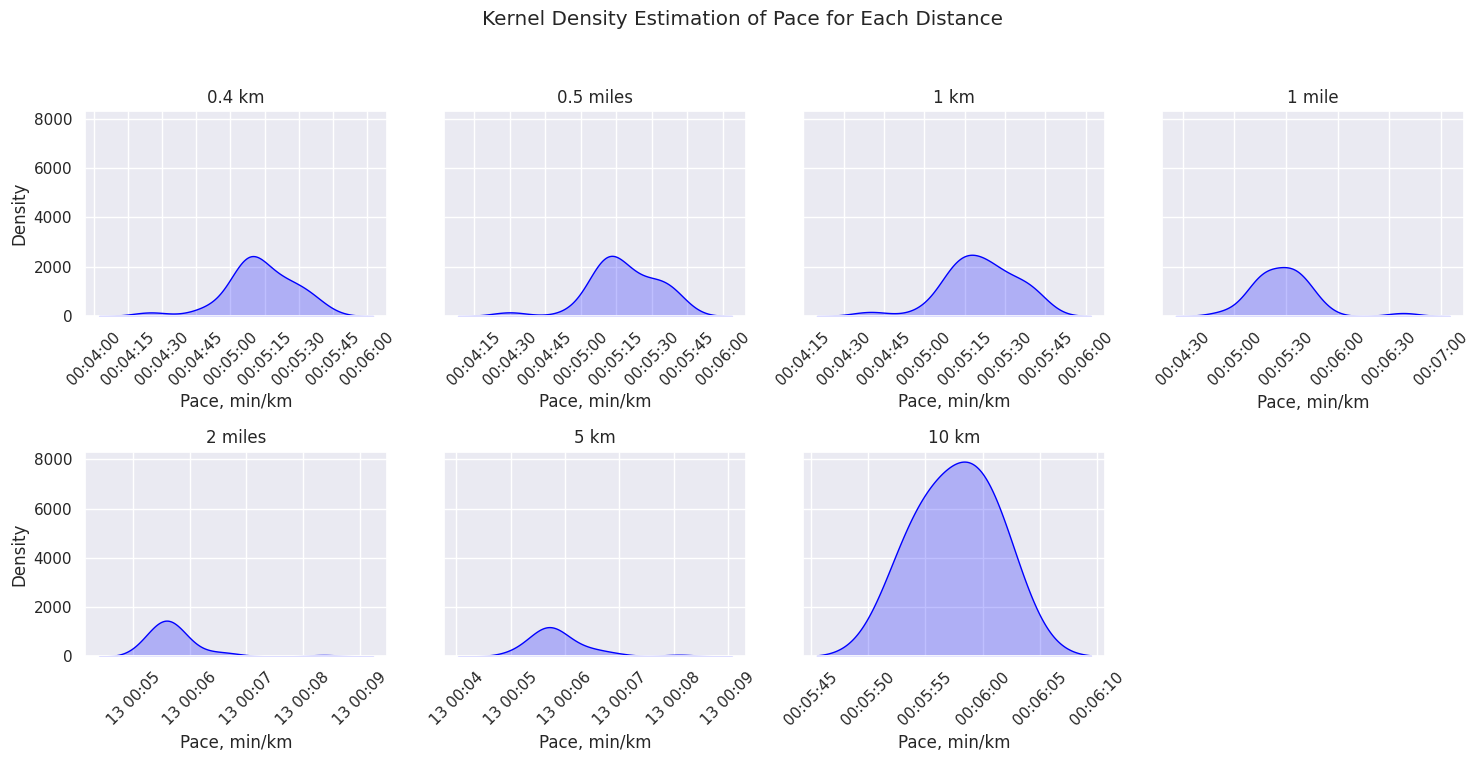

In [18]:
# Graph 2

import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

sns.set_theme()

distances = ['0.4 km', '0.5 miles', '1 km', '1 mile', '2 miles', '5 km', '10 km']
pace_data = [s_data_400m_new_ar, s_data_halfmile_new_ar, s_data_onekm_new_ar, s_data_onemile_new_ar, s_data_twomile_new_ar, s_data_fivekm_new_ar, s_data_tenkm_new_ar]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8), sharey=True)
fig.suptitle('Kernel Density Estimation of Pace for Each Distance')

axes = axes.flatten()

for i, (distance, data) in enumerate(zip(distances, pace_data)):
    sns.kdeplot(data, ax=axes[i], label=distance, fill=True, color='blue') # kernel density estimate (KDE) for each distance
    axes[i].set_title(distance)
    axes[i].set_xlabel('Pace, min/km')
    axes[i].tick_params(axis='x', rotation=45)

num_distances = len(distances)
num_cols = min(num_distances, 4)
num_rows = -(-num_distances // num_cols)

for j in range(num_distances, num_cols * num_rows):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

s_graph_2=fig

plt.show()

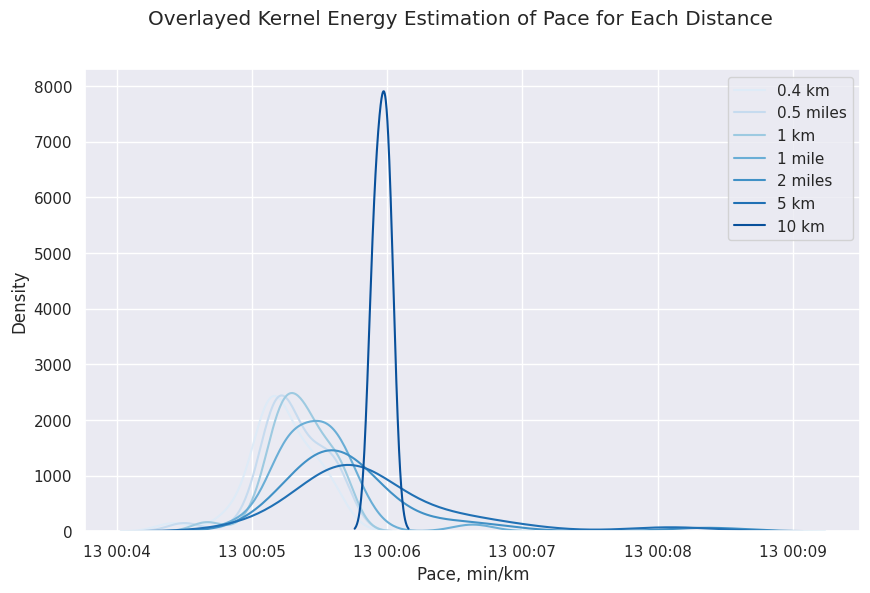

In [19]:
# Graph 3

distances = ['0.4 km', '0.5 miles', '1 km', '1 mile', '2 miles', '5 km', '10 km']
pace_data = [s_data_400m_new_ar, s_data_halfmile_new_ar, s_data_onekm_new_ar, s_data_onemile_new_ar, s_data_twomile_new_ar, s_data_fivekm_new_ar, s_data_tenkm_new_ar]
sns.set_theme()

fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Overlayed Kernel Energy Estimation of Pace for Each Distance')

palette = sns.color_palette('Blues', n_colors=len(distances))

def format_func(x, _):
    return (a_reference_date + timedelta(minutes=x)).strftime('%M:%S')

for i, (distance, data) in enumerate(zip(distances, pace_data)):
    sns.kdeplot(data, ax=ax, label=distance, fill=False, color=palette[i])

#for distance, data in zip(distances, pace_data):
#    sns.kdeplot(data, ax=ax, label=distance, fill=False) # Plot a kernel density estimate (KDE)

ax.set_xlabel('Pace, min/km')
ax.legend()
s_graph_3=fig
plt.show()

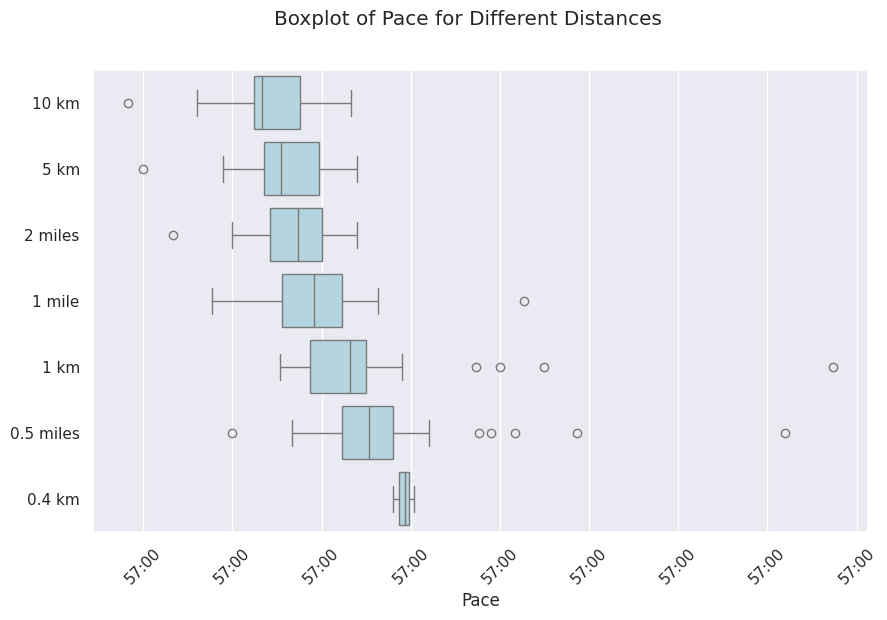

In [20]:
# Graph 4

distances = ['0.4 km', '0.5 miles', '1 km', '1 mile', '2 miles', '5 km', '10 km']
pace_data = [s_data_400m_new_ar, s_data_halfmile_new_ar, s_data_onekm_new_ar, s_data_onemile_new_ar, s_data_twomile_new_ar, s_data_fivekm_new_ar, s_data_tenkm_new_ar]
distances.reverse()

sns.set_theme()
all_pace_data = np.concatenate(pace_data)

fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Boxplot of Pace for Different Distances')

def format_func(x, _):
    return (s_reference_date + timedelta(minutes=x)).strftime('%M:%S')

sns.boxplot(x=all_pace_data, y=np.repeat(distances, [len(data) for data in pace_data]), ax=ax, color='lightblue')
ax.set_xlabel('Pace')
ax.tick_params(axis='x', rotation=45)
ax.xaxis.set_major_formatter(FuncFormatter(format_func))
s_graph_4=fig
plt.show()

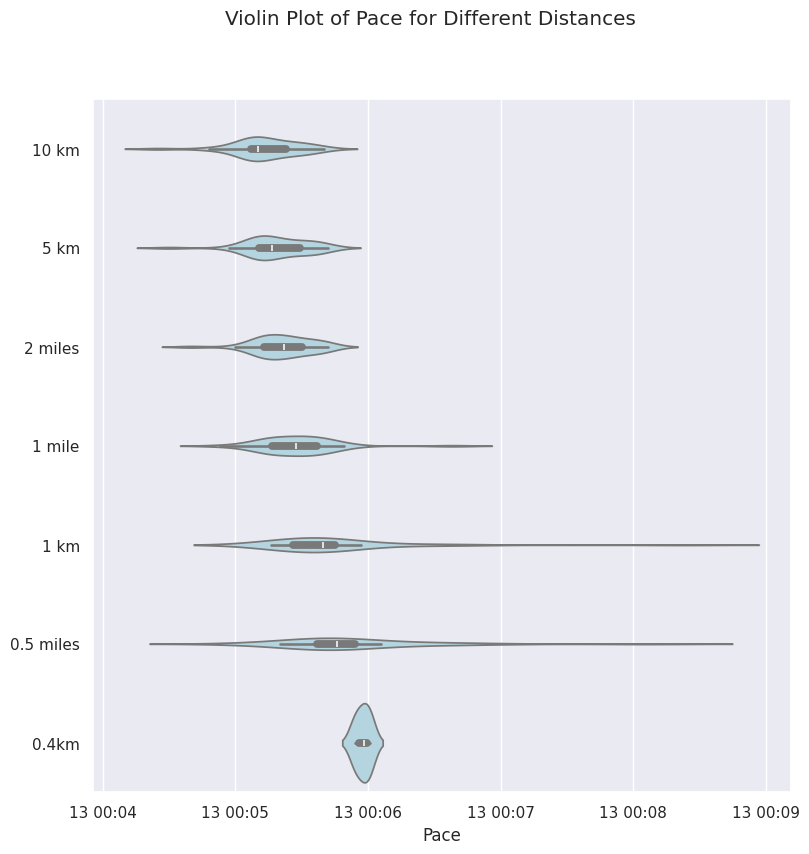

In [21]:
# Graph 5

distances = ['0.4km', '0.5 miles', '1 km', '1 mile', '2 miles', '5 km', '10 km']
pace_data = [s_data_400m_new_ar, s_data_halfmile_new_ar, s_data_onekm_new_ar, s_data_onemile_new_ar, s_data_twomile_new_ar, s_data_fivekm_new_ar, s_data_tenkm_new_ar]
distances.reverse()

sns.set_theme()
all_pace_data = np.concatenate(pace_data)

fig, ax = plt.subplots(figsize=(9, 9))
fig.suptitle('Violin Plot of Pace for Different Distances')

def format_func(x, _):
    return (s_reference_date + timedelta(minutes=x)).strftime('%M:%S')

sns.violinplot(x=all_pace_data, y=np.repeat(distances, [len(data) for data in pace_data]), ax=ax, color='lightblue')

ax.set_xlabel('Pace')
s_graph_5=fig
plt.show()

# ***USER 1 & USER 2 COMBINED GRAPHS***


In [22]:
# GRAPH 1

s_sizes = [dist * 3 for dist in s_distance]
a_sizes = [dist * 3 for dist in a_distance]

combined_fig_pacehr = go.Figure()
sns.set_theme()

combined_fig_pacehr.add_trace(go.Scatter(
    x=s_pace_new,
    y=s_hr,
    mode='markers',
    name='Soph',
    marker=dict(color='skyblue', size=s_sizes),
))

combined_fig_pacehr.add_trace(go.Scatter(
    x=a_pace_new,
    y=a_hr,
    mode='markers',
    name='Data mule',
    marker=dict(color='forestgreen',size=a_sizes),
))

# Update the layout
combined_fig_pacehr.update_layout(
    title='Scatter Plot of Pace vs. Heart Rate (point size scales with distance)',
    xaxis_title='Pace, min\km',
    yaxis_title='Heart Rate',
    height=700,
    width=900,
    xaxis=dict(
        tickformat='%M:%S',
    )
)

In [23]:
# GRAPH 2

s_sizes = [hr * 0.15 for hr in s_hr]  # Adjust the multiplier as needed
a_sizes = [hr * 0.15 for hr in a_hr]

combined_fig_pacehr = go.Figure()
sns.set_theme()

combined_fig_pacehr.add_trace(go.Scatter(
    x=s_distance,
    y=s_pace_new,
    mode='markers',
    name='Soph',
    marker=dict(color='skyblue', size=s_sizes),  # Set the color
))

combined_fig_pacehr.add_trace(go.Scatter(
    x=a_distance,
    y=a_pace_new,
    mode='markers',
    name='Data mule',
    marker=dict(color='forestgreen',size=a_sizes),  # Set the color
))

# Update the layout
combined_fig_pacehr.update_layout(
    title='Distance vs Pace',
    xaxis_title='Distance, km',
    yaxis_title='Pace, min/km',
    height=700,
    width=900,
    xaxis=dict(
        tickformat='%M:%S',  # Use '%M:%S' for minutes and seconds format
    )
)

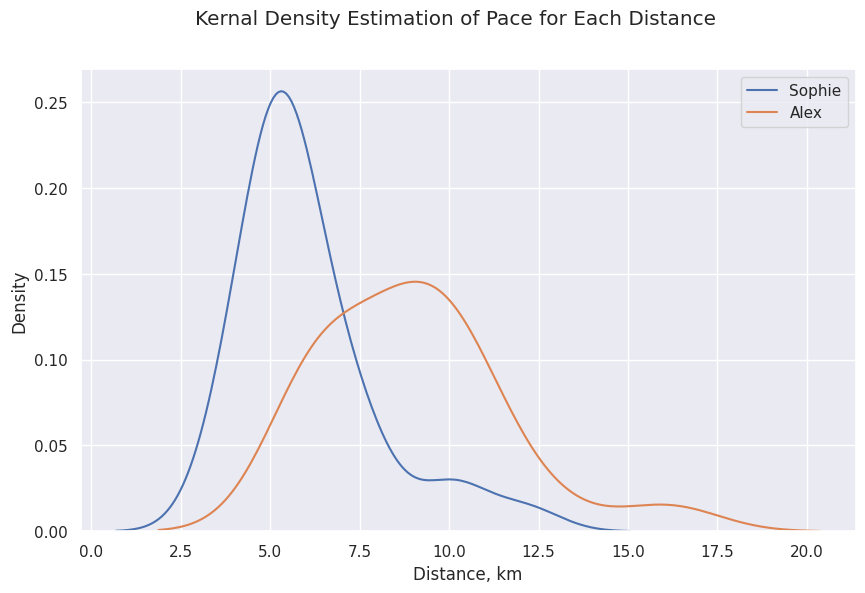

In [24]:
# GRAPH 3

distances = ['Sophie', 'Alex']
pace_data = [s_distance, a_distance]
sns.set_theme()

fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Kernal Density Estimation of Pace for Each Distance')

def format_func(x, _):
    return (a_reference_date + timedelta(minutes=x)).strftime('%M:%S')

for distance, data in zip(distances, pace_data):
    sns.kdeplot(data, ax=ax, label=distance, fill=False) # Plot a kernel density estimate (KDE)

ax.set_xlabel('Distance, km')
ax.legend()
as_graph_3=fig
plt.show()

# ***THE DASHBOARD***

In [26]:
from IPython.display import display, Markdown, HTML, clear_output
import ipywidgets as widgets
from ipywidgets import interact, Layout, Output, VBox, HBox

# Alex's Page: Graph Sizing

a_graph_1.figure.set_size_inches(7, 7)
a_graph_2.figure.set_size_inches(12, 7)
a_graph_3.figure.set_size_inches(7, 7)
a_graph_4.figure.set_size_inches(7, 7)

#a_graph_1.figure.set_dpi(70)
#a_graph_2.figure.set_dpi(70)
#a_graph_3.figure.set_dpi(70)
#a_graph_4.figure.set_dpi(70)

# Soph's Page: Graph Sizing

s_graph_1.figure.set_size_inches(6, 6)
s_graph_2.figure.set_size_inches(12, 6)
s_graph_3.figure.set_size_inches(6, 6)
s_graph_4.figure.set_size_inches(6, 6)

s_graph_1.figure.set_dpi(70)
s_graph_2.figure.set_dpi(70)
s_graph_3.figure.set_dpi(70)
s_graph_4.figure.set_dpi(70)

# Creating the Dashboard
dashboard_output = Output()
display(dashboard_output)

title_text = '<h1 style="font-size:80px;">THE DASHBOARD</h1>'
title_widget = Markdown(title_text)
display(title_widget)

page_1_content = HTML('<h1>User 1\'s Graphs</h1><p>.......</p>')
page_2_content = HTML('<h1>User 2\'s Graphs</h1><p>........</p>')
page_3_content = HTML('<h1>User 1 & Partner\'s Graphs </h1><p>........</p>')
page_4_content = HTML('<h1>User 1 & User 2\'s Graphs</h1><p>........</p>')

# Create a dropdown widget to select the page
page_selector = widgets.Dropdown(
    options=['User 1', 'User 2','User 1 & Partner','User 1 & User 2'],
    value='User 1',
    description='Select Page:'
)

def update_page(selected_page):
    if selected_page == 'User 1':
        display(page_1_content)

        # Putting Graphs 1 and 3 horizontally next to each other
        output_a1 = Output()
        output_a3 = Output()
        output_a4 = Output()

        with output_a1:
            clear_output(wait=True)
            display(a_graph_1.figure)

        with output_a3:
            clear_output(wait=True)
            display(a_graph_3.figure)

        with output_a4:
            clear_output(wait=True)
            display(a_graph_4.figure)

        horizontal_spacing = widgets.Label(layout=widgets.Layout(width="20px"))

        horizontal_layout_1_3 = HBox([output_a1, horizontal_spacing, output_a3])
        horizontal_layout_1_3_4 = HBox([horizontal_layout_1_3, horizontal_spacing, output_a4])

        display(horizontal_layout_1_3_4)

        #display(HTML("<br>"))
        display(a_graph_2.figure)

        #display(HTML("<br>"))        no 5th graph yet
        #display(a_graph_5.figure)

    elif selected_page == 'User 2':
        display(page_2_content)

        # Putting Graphs 1 and 3 horizontally next to each other
        output_s1 = Output()
        output_s3 = Output()
        output_s4 = Output()

        with output_s1:
            clear_output(wait=True)
            display(s_graph_1.figure)

        with output_s3:
            clear_output(wait=True)
            display(s_graph_3.figure)

        with output_s4:
            clear_output(wait=True)
            display(s_graph_4.figure)

        horizontal_spacing = widgets.Label(layout=widgets.Layout(width="20px"))

        horizontal_layout_1_3 = HBox([output_s1, horizontal_spacing, output_s3])
        horizontal_layout_1_3_4 = HBox([horizontal_layout_1_3, horizontal_spacing, output_s4])

        display(horizontal_layout_1_3_4)

        #display(HTML("<br>"))
        display(s_graph_2.figure)

        #display(HTML("<br>"))        no 5th graph yet
        #display(a_graph_5.figure)

    elif selected_page == 'User 1 & Partner':
        display(page_3_content)

        output_ab1 = Output()
        output_ab2 = Output()

        with output_ab1:
            clear_output(wait=True)
            display(ab_graph_1.figure)

        with output_ab2:
            clear_output(wait=True)
            display(ab_graph_2)

        horizontal_spacing = widgets.Label(layout=widgets.Layout(width="20px"))

        horizontal_layout = HBox([output_ab1, horizontal_spacing, output_ab2])
        display(horizontal_layout)

        #display(HTML("<br>"))
        #display(ab_graph_1.figure)

        #display(HTML("<br>"))
        #display(ab_graph_2.figure)

    elif selected_page == 'User 1 & User 2':
        display(page_4_content)

widgets.interact(update_page, selected_page=page_selector)
#display(page_selector)

Output()

<h1 style="font-size:80px;">THE DASHBOARD</h1>

interactive(children=(Dropdown(description='Select Page:', options=('User 1', 'User 2', 'User 1 & Partner', 'U…

<function __main__.update_page(selected_page)>